<a href="https://colab.research.google.com/github/BoranOner/Predicting-Diabetes/blob/main/Sat%C4%B1rVeS%C3%BCtunEksikDengesiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sklearn.metrics as metrics
from sklearn.metrics import RocCurveDisplay
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt    # visualization library (görselleştirme kütüphanesi)
import seaborn as sns         # visualization library (görselleştirme kütüphanesi)
import missingno as msno      # visualization library (görselleştirme kütüphanesi)
 #Hiperparametre için çağırıldı


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory



# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#**VERİ GÖRSELLEŞTİRME**

In [84]:
dataFrame = pd.read_csv("https://raw.githubusercontent.com/BoranOner/Predicting-Diabetes/main/diabetes.csv" ,encoding = 'unicode_escape')
print(dataFrame)

     Pregnancies  Glucose  ...  Age  Outcome
0              6      148  ...   50        1
1              1       85  ...   31        0
2              8      183  ...   32        1
3              1       89  ...   21        0
4              0      137  ...   33        1
..           ...      ...  ...  ...      ...
763           10      101  ...   63        0
764            2      122  ...   27        0
765            5      121  ...   30        0
766            1      126  ...   47        1
767            1       93  ...   23        0

[768 rows x 9 columns]


In [85]:
df1 = dataFrame.copy()
df2 = dataFrame.copy()
df3 = dataFrame.copy()

In [86]:
df1 = pd.DataFrame(df1)

In [87]:
df1.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [88]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [89]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [90]:
df1['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


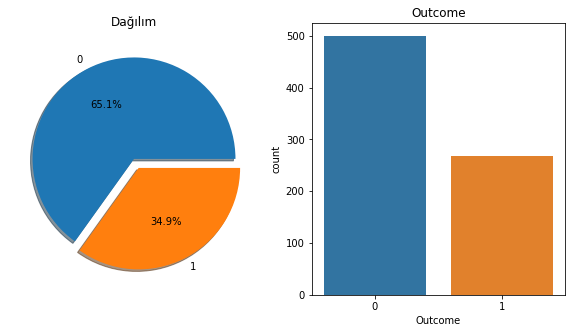

In [91]:
f,ax=plt.subplots(1,2,figsize=(10,5))
df1['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Dağılım')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=df1,ax=ax[1])
ax[1].set_title('Outcome')
plt.show()

In [92]:
df1.isnull().sum()  # null değer gözükmüyor 

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [93]:
df1[["Glucose","BloodPressure",
     "BMI"]] = df1[["Glucose","BloodPressure",
     "BMI"]].replace(0,np.NaN)
df1.isnull().sum()

Pregnancies                  0
Glucose                      5
BloodPressure               35
SkinThickness                0
Insulin                      0
BMI                         11
DiabetesPedigreeFunction     0
Age                          0
Outcome                      0
dtype: int64

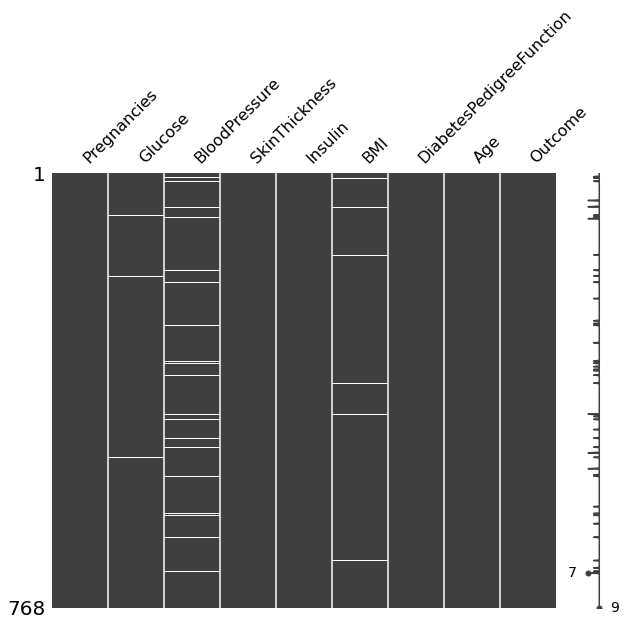

In [94]:
msno.matrix(df1,figsize=(10,8))
plt.show()

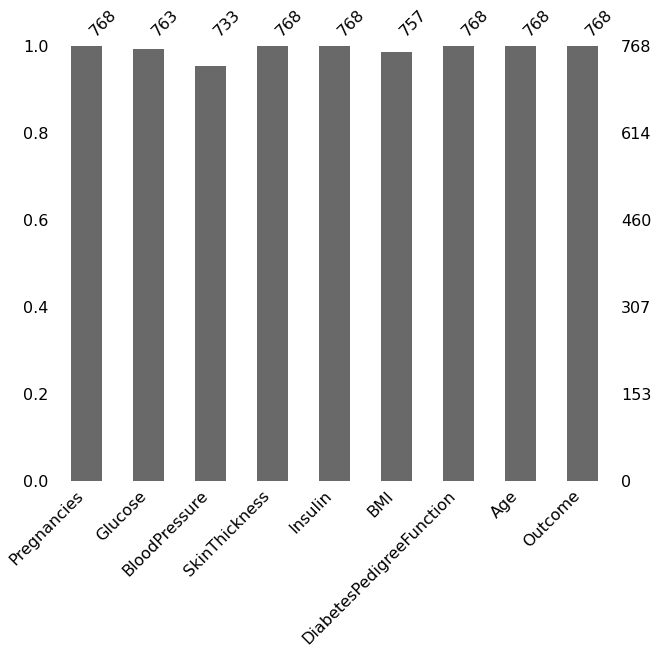

In [95]:
msno.bar(df1,figsize=(10,8))
plt.show()


In [96]:
df1 = df1.drop("Insulin", axis='columns') #çıkarılması gereken sütunlar

In [97]:
df1 = df1.drop("SkinThickness", axis='columns')

In [98]:
df1.dropna(inplace = True)

In [99]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    float64
 2   BloodPressure             724 non-null    float64
 3   BMI                       724 non-null    float64
 4   DiabetesPedigreeFunction  724 non-null    float64
 5   Age                       724 non-null    int64  
 6   Outcome                   724 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 45.2 KB


#***Standartlaştırma*** 

In [100]:
from sklearn.preprocessing import RobustScaler



rob_scaler = RobustScaler()
df1['Pregnancies'] = rob_scaler.fit_transform(df1['Pregnancies'].values.reshape(-1,1))
df1['Glucose'] = rob_scaler.fit_transform(df1['Glucose'].values.reshape(-1,1))
df1['BloodPressure'] = rob_scaler.fit_transform(df1['BloodPressure'].values.reshape(-1,1))
df1['BMI'] = rob_scaler.fit_transform(df1['BMI'].values.reshape(-1,1))
df1['DiabetesPedigreeFunction'] = rob_scaler.fit_transform(df1['DiabetesPedigreeFunction'].values.reshape(-1,1))
df1['Age'] = rob_scaler.fit_transform(df1['Age'].values.reshape(-1,1))
df1.head()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.6,0.733728,0.000,0.131868,0.648366,1.235294,1
1,-0.4,-0.757396,-0.375,-0.637363,-0.073203,0.117647,0
2,1.0,1.562130,-0.500,-1.000000,0.766013,0.176471,1
3,-0.4,-0.662722,-0.375,-0.472527,-0.554248,-0.470588,0
4,-0.6,0.473373,-2.000,1.175824,4.990850,0.235294,1


In [101]:
# veri setini train ve test olarak ayırıyoruz

from sklearn.model_selection import train_test_split

X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)



---

*Dengesiz Veri Seti*

---



In [102]:
y_train.value_counts()    


0    377
1    202
Name: Outcome, dtype: int64



---


#GAUSSIAN-NB

---



In [103]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,f1_score,recall_score,roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [104]:
gaussianNB = GaussianNB()
gaussianNB = gaussianNB.fit(X_train, y_train)

train_pred_gaussianNB = gaussianNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Train: ")
print(confusion_matrix(y_train, train_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gaussianNB))

print("-"*40)

test_pred_gaussianNB = gaussianNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gaussianNB)*100))

print("Confusion Matrix-GaussianNB-Test: ")
print(confusion_matrix(y_test, test_pred_gaussianNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gaussianNB))

Train Accuracy : 78.238% 
Confusion Matrix-GaussianNB-Train: 
[[325  52]
 [ 74 128]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.86      0.84       377
           1       0.71      0.63      0.67       202

    accuracy                           0.78       579
   macro avg       0.76      0.75      0.75       579
weighted avg       0.78      0.78      0.78       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-GaussianNB-Test: 
[[81 17]
 [21 26]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.60      0.55      0.58        47

    accuracy                           0.74       145
   macro avg       0.70      0.69      0.69       145
weighted avg       0.73      0.74      0.73       145



0.7478661659269376

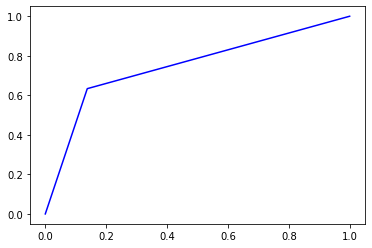

In [105]:
fpr , tpr , thresolds = metrics.roc_curve(y_train , train_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6898610508033001

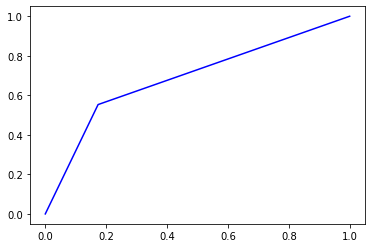

In [106]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_gaussianNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
GaussianNB Hiperparametre ile

---




In [107]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,  
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train, y_train)

gs_NB.best_params_

grid_predictions = gs_NB.predict(X_test)
 
# Sınıflandırma raporunu yazdırmak
print(classification_report(y_test, grid_predictions))


Fitting 5 folds for each of 100 candidates, totalling 500 fits
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        98
           1       0.62      0.55      0.58        47

    accuracy                           0.74       145
   macro avg       0.71      0.69      0.70       145
weighted avg       0.74      0.74      0.74       145





---



#**BERNOULLI NB**



---



In [108]:
from sklearn.naive_bayes import BernoulliNB

bernoulliNB = BernoulliNB()
bernoulliNB.fit(X_train, y_train)

train_pred_bernoulliNB = bernoulliNB.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Train: ")
print(confusion_matrix(y_train, train_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_bernoulliNB))

print("-"*40)


test_pred_bernoulliNB = bernoulliNB.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_bernoulliNB)*100))

print("Confusion Matrix-BernoulliNB-Test: ")
print(confusion_matrix(y_test, test_pred_bernoulliNB))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_bernoulliNB))





Train Accuracy : 71.848% 
Confusion Matrix-BernoulliNB-Train: 
[[296  81]
 [ 82 120]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.78      0.79      0.78       377
           1       0.60      0.59      0.60       202

    accuracy                           0.72       579
   macro avg       0.69      0.69      0.69       579
weighted avg       0.72      0.72      0.72       579

----------------------------------------
Test Accuracy  : 75.862% 
Confusion Matrix-BernoulliNB-Test: 
[[83 15]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.81      0.85      0.83        98
           1       0.64      0.57      0.61        47

    accuracy                           0.76       145
   macro avg       0.72      0.71      0.72       145
weighted avg       0.75      0.76      0.75       145



0.6896026472673793

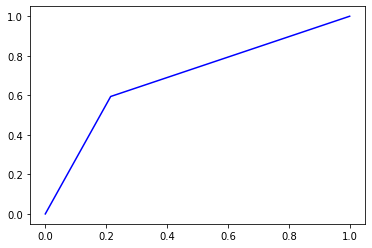

In [109]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



0.7107034303082935

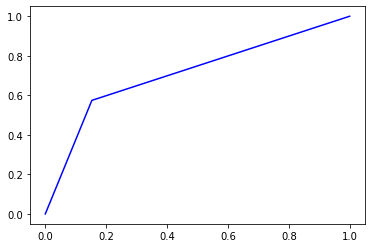

In [110]:


fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_bernoulliNB)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
BernoulliNB Hiperparametre İle

---




In [111]:
from sklearn.naive_bayes import BernoulliNB



In [112]:
parameters = [{'alpha':np.linspace(0.1,1,10)}]

clf = GridSearchCV(BernoulliNB(), parameters, scoring='f1')
clf.fit(X_train,y_train) 

# En iyi parametreyi yazdırmak
print("\n",clf.best_params_)
# Hiperparametre ayarından sonra modelimizin nasıl göründüğünü yazdır
print("\n",clf.best_estimator_)

clf_pre = clf.predict(X_test)

print(classification_report(y_test , clf_pre))


 {'alpha': 0.1}

 BernoulliNB(alpha=0.1)
              precision    recall  f1-score   support

           0       0.81      0.85      0.83        98
           1       0.64      0.57      0.61        47

    accuracy                           0.76       145
   macro avg       0.72      0.71      0.72       145
weighted avg       0.75      0.76      0.75       145





---



#**LogisticRegression**



---



In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [114]:
logisticRegression = LogisticRegression(random_state=123456)
logisticRegression.fit(X_train, y_train)


train_pred_logisticRegression = logisticRegression.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Train: ")
print(confusion_matrix(y_train, train_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_logisticRegression))

print("-"*40)

test_pred_logisticRegression = logisticRegression.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_logisticRegression)*100))

print("Confusion Matrix-LogisticRegression-Test: ")
print(confusion_matrix(y_test, test_pred_logisticRegression))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_logisticRegression))

Train Accuracy : 78.411% 
Confusion Matrix-LogisticRegression-Train: 
[[335  42]
 [ 83 119]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       377
           1       0.74      0.59      0.66       202

    accuracy                           0.78       579
   macro avg       0.77      0.74      0.75       579
weighted avg       0.78      0.78      0.78       579

----------------------------------------
Test Accuracy  : 75.862% 
Confusion Matrix-LogisticRegression-Test: 
[[86 12]
 [23 24]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.88      0.83        98
           1       0.67      0.51      0.58        47

    accuracy                           0.76       145
   macro avg       0.73      0.69      0.70       145
weighted avg       0.75      0.76      0.75       145



0.7388515376736613

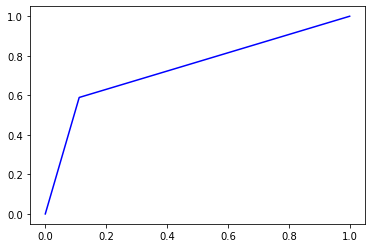

In [115]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6940946591402517

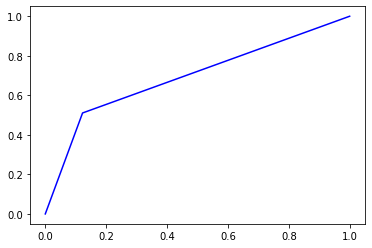

In [116]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_logisticRegression)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Logistic Regression Hiperparametreler İle

---




In [117]:
param ={"C":np.logspace(20,40,60), "penalty":["l2","none"]}  # logistic regresyon tekrar bak 

cv = GridSearchCV(LogisticRegression(), param, scoring = 'accuracy', cv=5,n_jobs=-1).fit(X_train,y_train)
print("Bulunan En İyi Parametreler: ", cv.best_params_)
print("En İyi Parametrelerin Verdiği Skor:",cv.best_score_)

Bulunan En İyi Parametreler:  {'C': 1e+20, 'penalty': 'l2'}
En İyi Parametrelerin Verdiği Skor: 0.7738080959520239




---



#**DECISION TREE**



---



In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.metrics import plot_confusion_matrix

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [119]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

train_pred_decision_tree = decision_tree.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Train: ")
print(confusion_matrix(y_train, train_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_decision_tree))

print("-"*40)

test_pred_decision_tree = decision_tree.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_decision_tree)*100))

print("Confusion Matrix-DecisionTreeClassifier-Test: ")
print(confusion_matrix(y_test, test_pred_decision_tree))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_decision_tree))

Train Accuracy : 100.000% 
Confusion Matrix-DecisionTreeClassifier-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 64.828% 
Confusion Matrix-DecisionTreeClassifier-Test: 
[[67 31]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.77      0.68      0.72        98
           1       0.47      0.57      0.51        47

    accuracy                           0.65       145
   macro avg       0.62      0.63      0.62       145
weighted avg       0.67      0.65      0.66       145



1.0

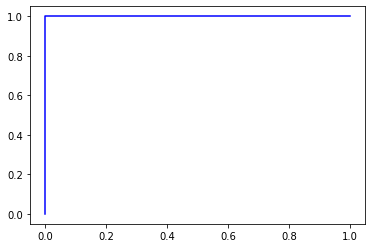

In [120]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6290707772470691

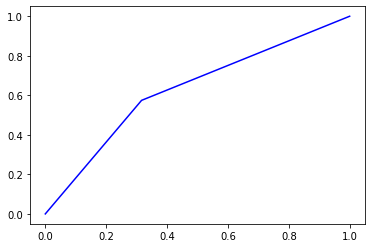

In [121]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_decision_tree)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

---
Decision Tree Hiperparametreler İle

---




In [122]:
param_dict= {"criterion":['gini' , 'entropy'],
             "max_depth"          : range(1,8),
             "min_samples_split"  : range(1,10),
             "min_samples_leaf"   : range(1,5), 
            }

detr=DecisionTreeClassifier()

detr_cv = GridSearchCV (detr,param_dict, verbose=0)
detr_cv.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
280 fits failed out of a total of 2520.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
280 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a flo

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 8),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [123]:
detr_cv.best_params_

grid_dt_predictions = detr_cv.predict(X_test)
 
# Sınıflandırma raporunu yazdırmak
print(classification_report(y_test, grid_dt_predictions))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80        98
           1       0.59      0.51      0.55        47

    accuracy                           0.72       145
   macro avg       0.68      0.67      0.67       145
weighted avg       0.72      0.72      0.72       145





---



#**SVM (SUPPORT VECTOR MACHINE)**



---



In [124]:
from sklearn import svm
from sklearn.svm import SVC

In [125]:
sv = svm.SVC(kernel='linear')
sv.fit(X_train , y_train)
X = df1.drop("Outcome", axis=1)
y = df1["Outcome"]
X_train_svm, X_test_svm , y_train_svm , y_test_svm = train_test_split(X, y, test_size=0.20, random_state=123456)
train_pred_svm = sv.predict(X_train_svm)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train_svm , train_pred_svm)*100))

test_pred_svm = sv.predict(X_test_svm)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test_svm, test_pred_svm)*100))

print("Confusion Matrix-SVM: ")
print(confusion_matrix(y_test_svm, test_pred_svm))



Train Accuracy : 77.893% 
Test Accuracy  : 75.172% 
Confusion Matrix-SVM: 
[[85 13]
 [23 24]]


In [126]:
print('\nModel Sonuçları\n')
print(classification_report(y_test_svm, test_pred_svm))


Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.65      0.51      0.57        47

    accuracy                           0.75       145
   macro avg       0.72      0.69      0.70       145
weighted avg       0.74      0.75      0.74       145



0.7337237702550097

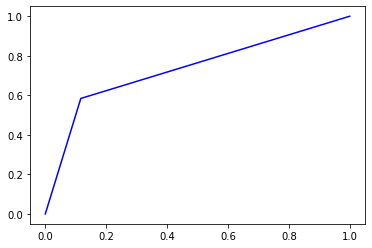

In [127]:
fpr , tpr , thresolds = metrics.roc_curve(y_train_svm, train_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6889926183239252

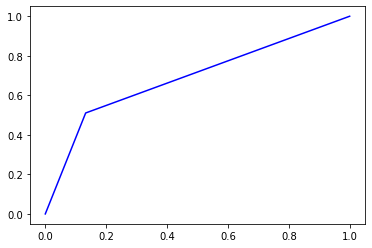

In [128]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_svm)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
SVM Hiperparametre İle


---




In [129]:
#Parametrenin Sınırlarını Belirtme

param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [ 0.0001 , 0.01 , 0.1 , 1],
              'kernel': ['rbf']}
model=SVC()
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 1)


#Modeli Fitlemek
grid.fit(X_train_svm, y_train_svm)
grid.fit(X_test_svm, y_test_svm)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [0.0001, 0.01, 0.1, 1], 'kernel': ['rbf']},
             verbose=1)

In [130]:
# En iyi parametreyi yazdırmak
print("\n",grid.best_params_)
# Hiperparametre ayarından sonra modelimizin nasıl göründüğünü yazdır
print("\n",grid.best_estimator_)



 {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

 SVC(C=100, gamma=0.01)


In [131]:
grid_predictions = grid.predict(X_test_svm)
 
# Sınıflandırma raporunu yazdırmak
print(classification_report(y_test_svm, grid_predictions))


              precision    recall  f1-score   support

           0       0.81      0.96      0.88        98
           1       0.86      0.53      0.66        47

    accuracy                           0.82       145
   macro avg       0.84      0.75      0.77       145
weighted avg       0.83      0.82      0.81       145



In [132]:
#Hiperparametre kullanmadan önce SVM modelimizin model accuracy %73 idi,sonrasında %79'a yükseldi.

print(classification_report(y_test_svm, test_pred_svm))
print("\n HIPERPARAMETRELERDEN SONRA \n")
print(classification_report(y_test_svm, grid_predictions))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        98
           1       0.65      0.51      0.57        47

    accuracy                           0.75       145
   macro avg       0.72      0.69      0.70       145
weighted avg       0.74      0.75      0.74       145


 HIPERPARAMETRELERDEN SONRA 

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        98
           1       0.86      0.53      0.66        47

    accuracy                           0.82       145
   macro avg       0.84      0.75      0.77       145
weighted avg       0.83      0.82      0.81       145





---



#**KNN (K-NEAREST NEIGHBORS)**



---



In [133]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold

In [134]:
knn = KNeighborsClassifier().fit(X_train , y_train)

In [135]:
pred_knn= knn.predict(X_test)

In [136]:
print("KNN Training Accuracy:" ,knn.score(X_train , y_train))
print("KNN Test Accuracy:" ,knn.score(X_test , y_test))
print("***********")


print(classification_report(y_test, pred_knn))

KNN Training Accuracy: 0.8376511226252159
KNN Test Accuracy: 0.7241379310344828
***********
              precision    recall  f1-score   support

           0       0.77      0.84      0.80        98
           1       0.59      0.49      0.53        47

    accuracy                           0.72       145
   macro avg       0.68      0.66      0.67       145
weighted avg       0.71      0.72      0.72       145



In [137]:
print("Confusion Matrix-KNN: ")
confusion_matrix(y_test, pred_knn)


Confusion Matrix-KNN: 


array([[82, 16],
       [24, 23]])

0.6630481980026053

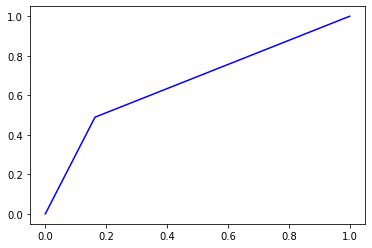

In [138]:
fpr , tpr , thresolds = metrics.roc_curve(y_test , pred_knn)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---



*KNN modeli için hiperparametreleri bulma*

---



In [139]:
#KNN modelinde en iyi parametreleri bulmak için üç önemli parametreyi aldık. Değer aralıklarını belirtip GridSearchCV ile en iyi sonucu veren parametreleri tespit ettik.



stratified_kfold = StratifiedKFold(n_splits=5,   #Diğerlerinden farklı olarak burada Straified K Fold Cross-Validation kullanıldı.)
                                       shuffle=False,
                                       random_state=None)

param_grid = {
              'n_neighbors': [3, 5, 11, 19],
              'weights': ['uniform'  , 'distance'],
              'metric': ['euclideans', 'manhattan']
              }
model = KNeighborsClassifier()
grid_search = GridSearchCV(model, param_grid,scoring='roc_auc', refit = True, cv=stratified_kfold,  verbose = 1)


grid_search.fit(X_train, y_train)

 

Fitting 5 folds for each of 16 candidates, totalling 80 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
40 fits failed out of a total of 80.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
40 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 437, in _fit
    self._check_algorithm_metric()
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neig

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclideans', 'manhattan'],
                         'n_neighbors': [3, 5, 11, 19],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc', verbose=1)

In [140]:
cv_score = grid_search.best_score_
test_score = grid_search.score(X_test, y_test)
print(f'Cross-validation score: {cv_score} \n Test score: {test_score}')


Cross-validation score: 0.8251460633290544 
 Test score: 0.8263135041250542


In [141]:
#KNN için en iyi parametreleri bulduk ve aşağıda modelimizin bu parametrelerle çıkan sonucunu görüyoruz.

knn_predict = grid.predict(X_test)
 
# Sınıflandırma raporunu yazdır
print(classification_report(y_test, knn_predict))

              precision    recall  f1-score   support

           0       0.81      0.96      0.88        98
           1       0.86      0.53      0.66        47

    accuracy                           0.82       145
   macro avg       0.84      0.75      0.77       145
weighted avg       0.83      0.82      0.81       145



0.7455492835432045

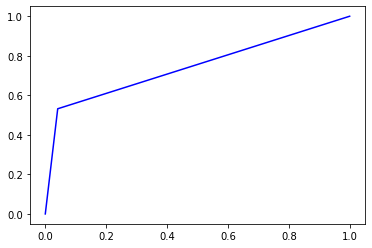

In [142]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, knn_predict)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---



#**MLP (MULTILAYER PERCEPTRON)**



---



In [143]:
from sklearn.neural_network import MLPClassifier

In [144]:
mlp = MLPClassifier(max_iter=3000)
X_train_mlp , X_test_mlp , y_train_mlp , y_test_mlp =train_test_split(X,y,test_size=0.20,random_state=12345)

In [145]:
mlp.fit(X_train , y_train)

MLPClassifier(max_iter=3000)

In [146]:
print("MLP Training Accuracy : " , format(mlp.score(X_train_mlp , y_train_mlp)))
print("\nMLP Test Accuracy     : " , format(mlp.score(X_test_mlp , y_test_mlp)))
pred_mlp= mlp.predict(X_test_mlp)

print(classification_report(y_test_mlp, pred_mlp))

MLP Training Accuracy :  0.8911917098445595

MLP Test Accuracy     :  0.9379310344827586
              precision    recall  f1-score   support

           0       0.95      0.96      0.95        94
           1       0.92      0.90      0.91        51

    accuracy                           0.94       145
   macro avg       0.93      0.93      0.93       145
weighted avg       0.94      0.94      0.94       145



In [147]:
print("Confusion Matrix-MLP: ")
print(confusion_matrix(y_test_mlp, pred_mlp))

Confusion Matrix-MLP: 
[[90  4]
 [ 5 46]]


0.9297037964121819

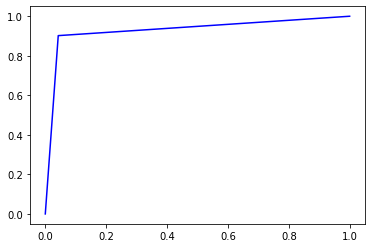

In [148]:
fpr , tpr , thresolds = metrics.roc_curve(y_test_mlp,pred_mlp)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Hiperparametre ile MLP

---





In [149]:
mlp_gs = MLPClassifier(max_iter=1000)
parameter_space = {
    'hidden_layer_sizes': [(10,30,10),(20,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=5, cv=5)
clf.fit(X_test_mlp, y_test_mlp) 

GridSearchCV(cv=5, estimator=MLPClassifier(max_iter=1000), n_jobs=5,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(10, 30, 10), (20,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [150]:
grid_predictions = mlp.predict(X_test_mlp)

print(classification_report(y_test_mlp, grid_predictions))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95        94
           1       0.92      0.90      0.91        51

    accuracy                           0.94       145
   macro avg       0.93      0.93      0.93       145
weighted avg       0.94      0.94      0.94       145



Hiperparametre ile Grafik

0.9297037964121819

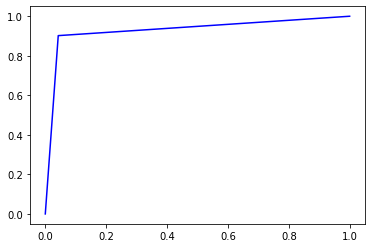

In [151]:
fpr , tpr , thresolds = metrics.roc_curve(y_test_mlp, grid_predictions)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---



#**RANDOM FOREST**



---



In [152]:
from sklearn.ensemble import RandomForestClassifier as randomForest
from sklearn.model_selection import KFold, train_test_split, cross_val_predict, cross_val_score
from sklearn import metrics


In [153]:
randomForest = randomForest()
randomForest.fit(X_train,y_train)

train_pred_randomForest = randomForest.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_randomForest)*100))
print("Confusion Matrix-randomForest-Train: ")
print(confusion_matrix(y_train, train_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_randomForest))

print("-"*40)

test_pred_randomForest = randomForest.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_randomForest)*100))

print("Confusion Matrix-randomForest-Test: ")
print(confusion_matrix(y_test, test_pred_randomForest))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_randomForest))

Train Accuracy : 100.000% 
Confusion Matrix-randomForest-Train: 
[[377   0]
 [  0 202]]

Model Sonuçları

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       377
           1       1.00      1.00      1.00       202

    accuracy                           1.00       579
   macro avg       1.00      1.00      1.00       579
weighted avg       1.00      1.00      1.00       579

----------------------------------------
Test Accuracy  : 80.000% 
Confusion Matrix-randomForest-Test: 
[[86 12]
 [17 30]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        98
           1       0.71      0.64      0.67        47

    accuracy                           0.80       145
   macro avg       0.77      0.76      0.76       145
weighted avg       0.80      0.80      0.80       145



1.0

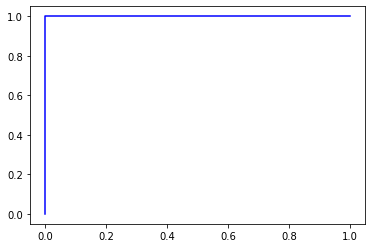

In [154]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.7579244463742945

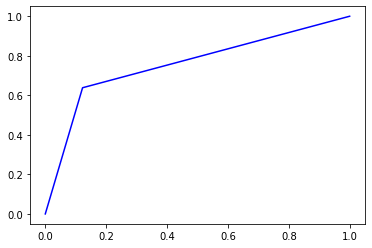

In [155]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_randomForest)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
Random Forest Hiperparametre İle


---




In [156]:
rf_params = {
            'max_depth': [10, 50, None],
            'min_samples_leaf': [1, 2, 4],
            'min_samples_split': [2, 10],
            'n_estimators': [200, 400, 2000]
             }

cv = GridSearchCV(randomForest,rf_params,cv=5,verbose=False,n_jobs=-1).fit(X_test,y_test)
print(cv.best_params_)
print(cv.best_score_)

{'max_depth': 50, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
0.7448275862068965




---



#**GRADIENT BOOSTING**



---



In [157]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting

In [158]:
gradientBoosting = gradientBoosting()
gradientBoosting.fit(X_train, y_train)

train_pred_gradientBoosting = gradientBoosting.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Train: ")
print(confusion_matrix(y_train, train_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_gradientBoosting))

print("-"*40)

test_pred_gradientBoosting = gradientBoosting.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_gradientBoosting)*100))

print("Confusion Matrix-gradientBoosting-Test: ")
print(confusion_matrix(y_test, test_pred_gradientBoosting))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_gradientBoosting))

Train Accuracy : 92.573% 
Confusion Matrix-gradientBoosting-Train: 
[[368   9]
 [ 34 168]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.92      0.98      0.94       377
           1       0.95      0.83      0.89       202

    accuracy                           0.93       579
   macro avg       0.93      0.90      0.92       579
weighted avg       0.93      0.93      0.92       579

----------------------------------------
Test Accuracy  : 73.793% 
Confusion Matrix-gradientBoosting-Test: 
[[80 18]
 [20 27]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.80      0.82      0.81        98
           1       0.60      0.57      0.59        47

    accuracy                           0.74       145
   macro avg       0.70      0.70      0.70       145
weighted avg       0.74      0.74      0.74       145



In [159]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting

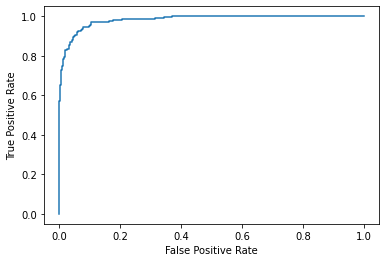

In [160]:
clf = make_pipeline(StandardScaler(), gradientBoosting())
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_train)

fpr, tpr, _ = roc_curve(y_train, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

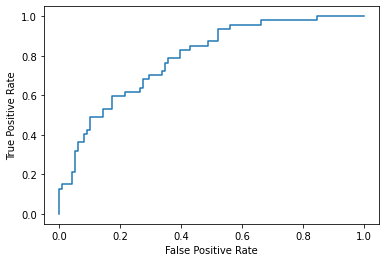

In [161]:
clf = make_pipeline(StandardScaler(), gradientBoosting())
clf.fit(X_train,y_train)
y_score = clf.decision_function(X_test)

fpr, tpr, _ = roc_curve(y_test, y_score, pos_label=clf.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()



---
Gradient Boosting Hiperparametre İle


---




In [162]:
from sklearn.ensemble import GradientBoostingClassifier  as gradientBoosting


param    = {
              "criterion": ["friedman_mse"],
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.01,0.05,0.1,1,0.5], 
              'max_depth': [3,4,5],
              'min_samples_leaf': [4,5,6],

              'subsample': [0.6,0.7,0.8],
              'n_estimators': [5,10,15,20],
              
            }
    
model_gboosting = gradientBoosting()
grid_gb  = GridSearchCV(model_gboosting , param , verbose=1).fit(X_test,y_test)
print(grid_gb.best_params_)
print(grid_gb.best_score_)

Fitting 5 folds for each of 2160 candidates, totalling 10800 fits
{'criterion': 'friedman_mse', 'learning_rate': 1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 15, 'subsample': 0.8}
0.7724137931034483




---



#**XG BOOST**



---



In [163]:
import xgboost as xgb
from xgboost import XGBClassifier as xgBoost


In [164]:
xgBoost = xgBoost(use_label_encoder=False,eval_metric = 'error')

xgBoost.fit(X_train, y_train)

train_pred_xgBoost = xgBoost.predict(X_train)
print('Train Accuracy : %.3f%% ' % (accuracy_score(y_train , train_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Train: ")
print(confusion_matrix(y_train, train_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_train, train_pred_xgBoost))

print("-"*40)

test_pred_xgBoost = xgBoost.predict(X_test)
print('Test Accuracy  : %.3f%% ' % (accuracy_score(y_test, test_pred_xgBoost)*100))

print("Confusion Matrix-xgBoost-Test: ")
print(confusion_matrix(y_test, test_pred_xgBoost))

print('\nModel Sonuçları\n')
print(classification_report(y_test, test_pred_xgBoost))

Train Accuracy : 88.774% 
Confusion Matrix-xgBoost-Train: 
[[354  23]
 [ 42 160]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.89      0.94      0.92       377
           1       0.87      0.79      0.83       202

    accuracy                           0.89       579
   macro avg       0.88      0.87      0.87       579
weighted avg       0.89      0.89      0.89       579

----------------------------------------
Test Accuracy  : 73.103% 
Confusion Matrix-xgBoost-Test: 
[[81 17]
 [22 25]]

Model Sonuçları

              precision    recall  f1-score   support

           0       0.79      0.83      0.81        98
           1       0.60      0.53      0.56        47

    accuracy                           0.73       145
   macro avg       0.69      0.68      0.68       145
weighted avg       0.72      0.73      0.73       145



0.8655356251805553

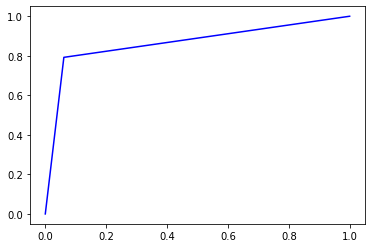

In [165]:
fpr , tpr , thresolds = metrics.roc_curve(y_train, train_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc

0.6792227529309596

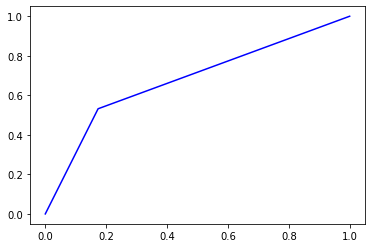

In [166]:
fpr , tpr , thresolds = metrics.roc_curve(y_test, test_pred_xgBoost)
roc_auc = metrics.auc(fpr , tpr)
plt.plot(fpr , tpr ,'b' ,label = 'AUC =0.2f' %roc_auc)
roc_auc



---
XGBoost Hiperparametreler İle


---




In [167]:
from xgboost import XGBClassifier
model_xgb   = XGBClassifier(seed=None)
parameters  = {
                "max_depth": range (2, 10, 1),
                "n_estimators": range(60, 220, 40),
                "learning_rate": [0.1, 0.01, 0.05]
                }

grid_xgb   = GridSearchCV (model_xgb , parameters, verbose=1) 

grid_xgb.fit (X_train , y_train)
print(grid_gb.best_params_)
print(grid_gb.best_score_)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
{'criterion': 'friedman_mse', 'learning_rate': 1, 'loss': 'deviance', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 6, 'n_estimators': 15, 'subsample': 0.8}
0.7724137931034483
